<a href="https://colab.research.google.com/github/nicholassolomon/Kaggle_Titanic_Competition/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic EDA

Exploratory data analysis of Titanic Data Set

```
02.01.24
```

## Setup

In [1]:
# install
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1
# then restart kernel


In [2]:
# libraries
import numpy as np
import pandas as pd
import missingno

# profiling and plotting data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter

from sklearn import tree, preprocessing, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')





/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


## Get Datasets

In [3]:
import os
from pathlib import Path

data_path = Path("data/")

if data_path.is_dir():
  print("Non need to download data -- alread there")
else:
  data_path.mkdir(parents=True, exist_ok=True)

# get data from book repo
!git clone https://github.com/nicholassolomon/Kaggle_Titanic_Competition.git
!mv Kaggle_Titanic_Competition/data/*.csv data
!rm -rf Kaggle_Titanic_Competition


Non need to download data -- alread there
Cloning into 'Kaggle_Titanic_Competition'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 690.97 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Profile Report

In [4]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_submit = pd.read_csv('./data/gender_submission.csv')


profile_train = ProfileReport(df_train, title='Titanic Training Data')
#profile_test = ProfileReport(df_test, title='Titanic Testing Data')
#profile_submit = ProfileReport(df_submit, title='Titanic Submission Data Sample')

profile_train.to_notebook_iframe()

#save to file
profile_train.to_file('Titanic Training Data EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Missing Data

<AxesSubplot:>

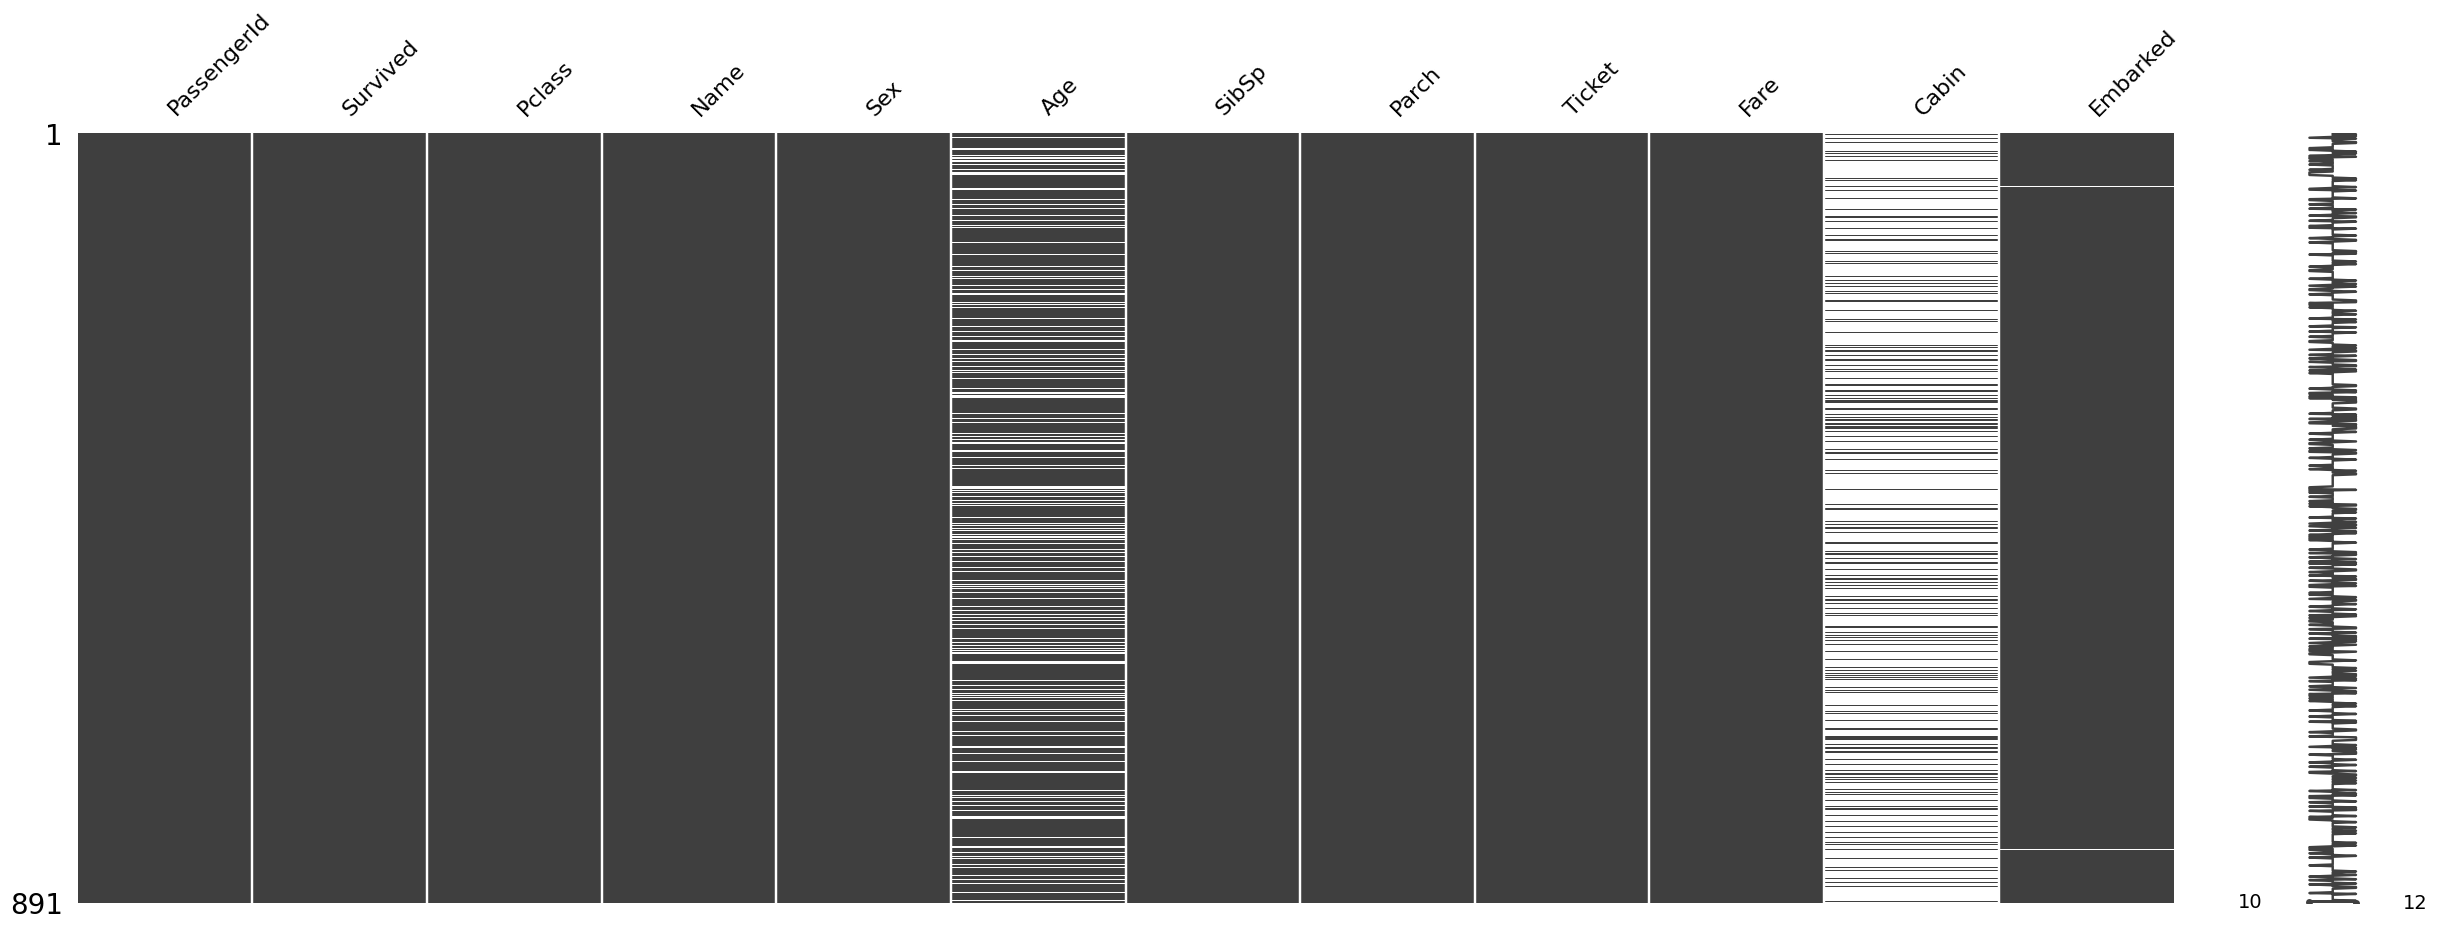

In [5]:
# Plot graphic of missing values
missingno.matrix(df_train, figsize = (30,10))

In [6]:
# Alternatively, you can see the number of missing values like this
missing_data = df_train.isnull().sum()
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Features


### Feature Details

* PassengerId.  unique ID (int) in the range from 1 to 891.  No missing.
* Survived. (int) categorical 0 = died (549), 1 = survived (342). No missing.
* Pclass (int)(passenger class). categorical: 1-3. 1=upper, 2=middle, 3=lower. No missing.
* Name (string) (passenger name). High cardinality, unique -- all different, no dupes, no missing.
* Sex (string). categorical. "male"=577, "female"=314" No missing.
* Age (float). Range from 0.42-80. 177 (20%) missing values! Mean = 29.7.
* SibSp (int) (# of siblings/spouces on board). Range 0-8. No missing. 68%=0.
* Parch (int) (# of parents/children on board). Range 0-6. No missing. 76%=0.
* Ticket (string) (ticket #). high cardinality, unique. No missing
* Fare (float) (cost of ticket). No missing. Range 0-512.32
* Cabin (string) (cabin number). categorical. Missing 78%!
* Embarked (string) (where passenger embarked). categorical. S=644, C=168, Q=77. Missing 2 values.

Features that will need to be converted to numbers:
* Sex
* Embarked

Features missing data:
* Embarked - only missing two. Drop or fill in?
* Age - 20% are missing!  Drop or fill in somehow?
* Cabin - 78% are missing!  Drop?

Questions:
1. What do the following have to do with survival?
 - age
 - sex
 - embark
 - cabin
 - passenger class
 - single or not



### Feature: Sex

In [7]:
df_train.groupby('Sex').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893

<AxesSubplot:xlabel='Survived', ylabel='count'>

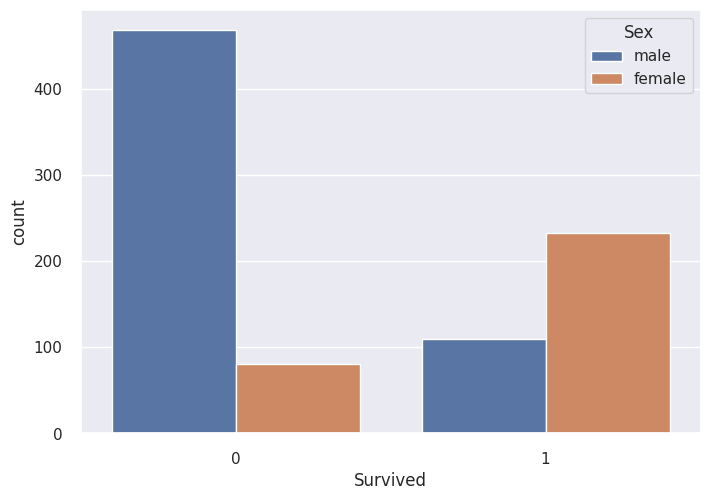

In [8]:
sns.set(style="darkgrid")
sns.countplot(x='Survived', data=df_train, hue="Sex")

### Feature: Embarked

In [9]:
df_train.groupby('Embarked').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Embarked                                                                   
C          445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
Q          417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
S          449.527950  0.336957  2.350932  29.445397  0.571429  0.413043   

               Fare  
Embarked             
C         59.954144  
Q         13.276030  
S         27.079812

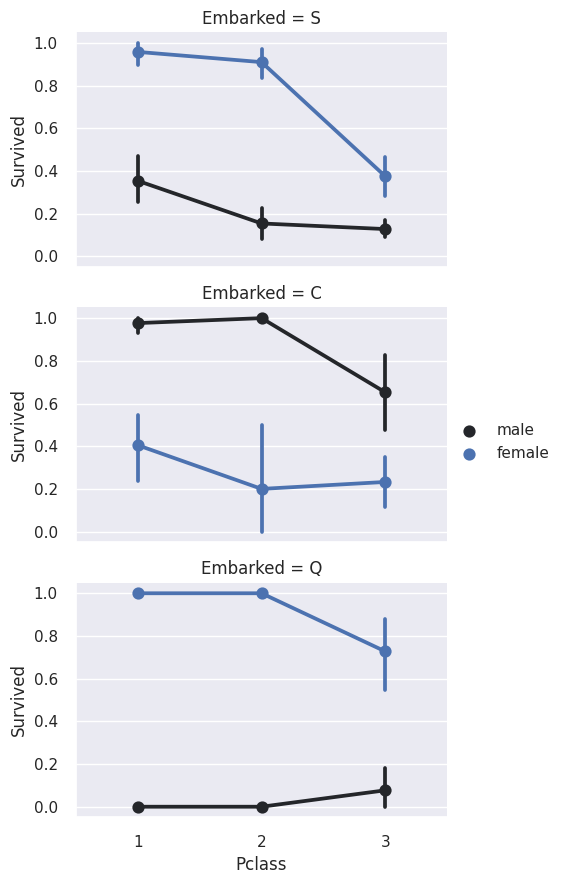

In [10]:
fg = sns.FacetGrid(df_train, row="Embarked", dropna=True, aspect=1.6)
fg.map(sns.pointplot, "Pclass", "Survived", "Sex", order=None, hue_order=None)
fg.add_legend()

### Feature: Age

Excellent Age-Sex-Survived plot thanks to porvakanti (https://github.com/porvakanti/Kaggle-Competition-TitanicSurvival)

In [11]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

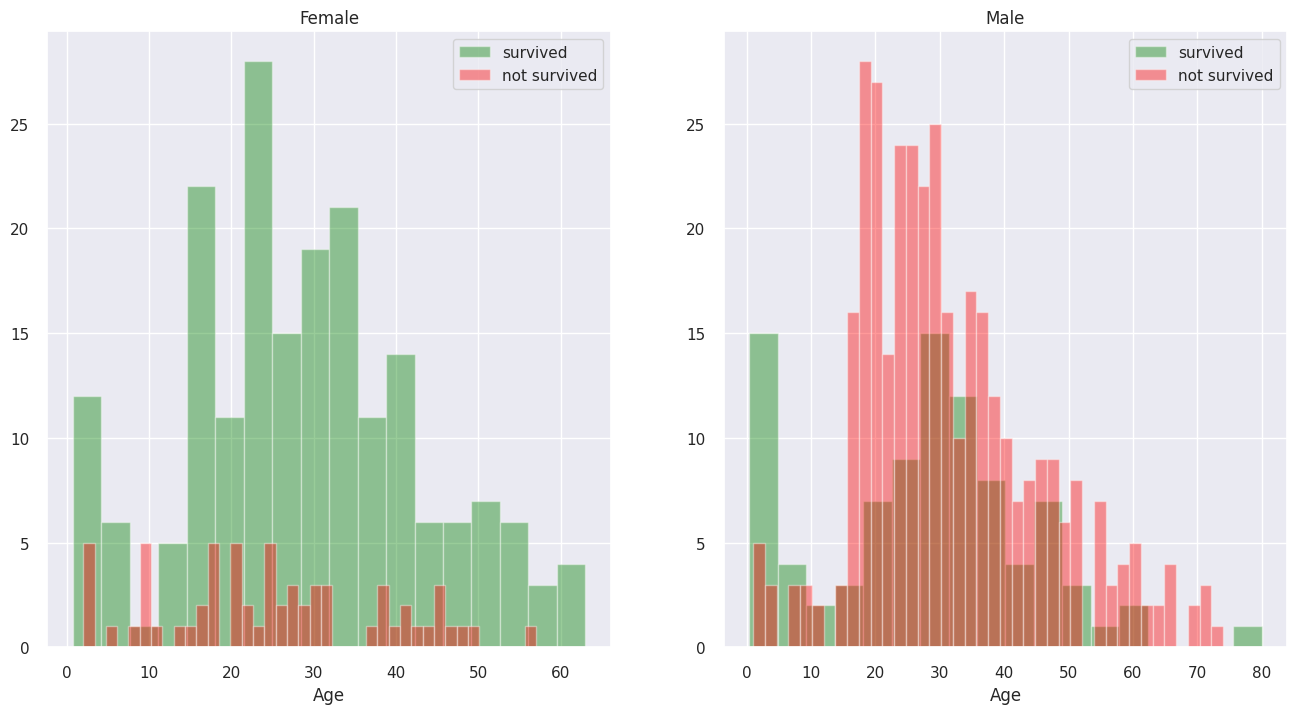

In [12]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

##### Age does seem to be important, but too many missing ages to drop. Impute the missing age (may need to experiment to see what is the best method: porvakanti used random number between the mean and std: `rand_age = np.random.randint(mean - std, mean + std, size = is_null)

### Feature: Passenger Class (Pclass)

In [13]:
df_train.groupby('Pclass').mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

In [14]:
df_train.Pclass==1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

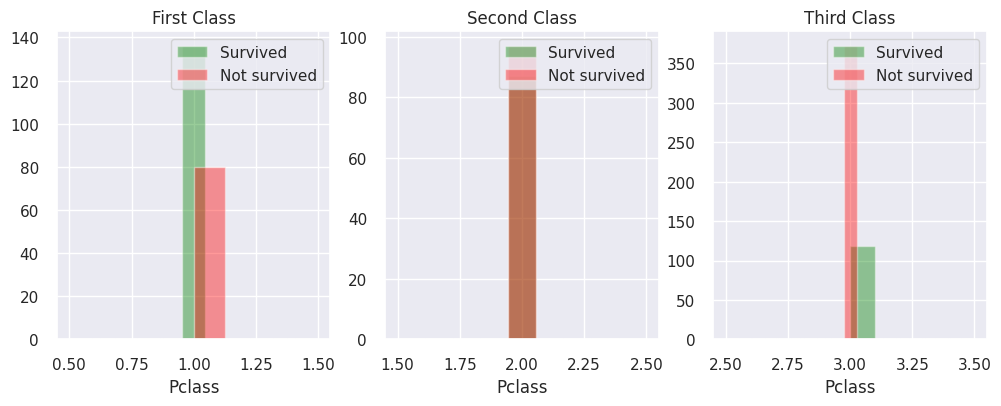

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12, 4))
class1 = df_train[df_train['Pclass']==1]
class2 = df_train[df_train['Pclass']==2]
class3 = df_train[df_train['Pclass']==3]
ax = sns.distplot(class1[class1['Survived']==1].Pclass.dropna(), label = "Survived", ax = axes[0], kde =False, color="green")
ax = sns.distplot(class1[class1['Survived']==0].Pclass.dropna(), label = "Not survived", ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('First Class')

ax = sns.distplot(class2[class2['Survived']==1].Pclass.dropna(), label = "Survived", ax = axes[1], kde =False, color="green")
ax = sns.distplot(class2[class2['Survived']==0].Pclass.dropna(), label = "Not survived", ax = axes[1], kde =False, color="red")
ax.legend()
_ = ax.set_title('Second Class');

ax = sns.distplot(class3[class3['Survived']==1].Pclass.dropna(), label = "Survived", ax = axes[2], kde =False, color="green")
ax = sns.distplot(class3[class3['Survived']==0].Pclass.dropna(), label = "Not survived", ax = axes[2], kde =False, color="red")
ax.legend()
_ = ax.set_title('Third Class');


### Feature: Cabin